In [1]:
import numpy as np
import pandas as pd
from __future__ import unicode_literals
import requests

In [2]:
import nltk
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
import re
import logging
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

porter_stemmer  = PorterStemmer()
from re import sub
from time import time 

In [3]:
api_key='pub_1898354cdbe92b1135ba327355c0801e72df7'

In [4]:
def api_call(params):
    from_date=params['from_date']
    to_date=params['to_date']
    keyword=params['keyword']
    category=params['category']
    country=params['country']
    url='https://newsdata.io/api/1/news?apikey={}&q={}&from_date={}&to_date={}&category={}&country={}&language=en'.format(api_key,keyword,from_date,to_date,category,country)
    res=requests.request('GET',url).json()
    
    return res

In [5]:
#https://newsdata.io/api/1/archive?apikey=pub_189814c0536d2d17948cff1e1472a548e8bf9&from_date=2022-12-12

In [6]:
def create_params(from_date,to_date,keyword,category,country):
    params={}
    params['from_date']=from_date
    params['to_date']=to_date
    params['keyword']=keyword
    params['category']=category
    params['country']=country
    return params

In [7]:
def make_dataFrame(r,no_of_article):    
    data=[]
    for i in range(no_of_article):
        data_json={}
        data_json['content']=r['results'][i]['content']
        data_json['category']=r['results'][i]['category'][0]
        data_json['country']=r['results'][i]['country'][0]
        data_json['pubDate']=r['results'][i]['pubDate']
        data_json['title']=r['results'][i]['title']
        data.append(data_json)
    df=pd.DataFrame(data,columns=['pubDate','title','country','category','content'])
    return df

In [18]:
from_date='2023-01-01'
to_date='2023-03-10'
keyword='tech'
category='business'
country='US'
params=create_params(from_date,to_date,keyword,category,country)
res_tech=api_call(params)

In [19]:
res_tech

{'status': 'success',
 'totalResults': 14,
 'results': [{'title': 'Starting a Managed Service Provider Business?',
   'link': 'https://techniciansnow.com/starting-a-managed-service-provider-business/',
   'keywords': ['Business'],
   'creator': ['Sandy'],
   'video_url': None,
   'description': 'If you are thinking about starting a managed service provider business, you are right on target. The need has never been greater for such services and industry predictions suggest that, as tech continues to grow with greater complexity and more requirements, the need for managed service providers will be exponentially increased. As a startup, you’ll […]',
   'content': 'If you are thinking about starting a managed service provider business, you are right on target. The need has never been greater for such services and industry predictions suggest that, as tech continues to grow with greater complexity and more requirements, the need for managed service providers will be exponentially increased.

In [14]:
#https://newsdata.io/api/1/news?apikey=pub_189814c0536d2d17948cff1e1472a548e8bf9&q=YOUR_QUERY

The aim is to generate 5 sets of articles with 5 different keywords

In [20]:
num_of_article=10 # limiting the number of articles to 10
df_tech=make_dataFrame(res_tech,num_of_article)

In [21]:
df_tech.head()

,pubDate,title,country,category,content
0,2023-05-02 10:40:42,Starting a Managed Service Provider Business?,united states of america,business,If you are thinking about starting a managed s...
1,2023-05-01 21:39:49,Bitcoin Drops Below $28K; JPMorgan Takes Over ...,united states of america,top,Jocelyn Yang Jocelyn Yang is a markets reporte...
2,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...
3,2023-05-01 14:17:48,AI Stocks To Watch As Big Tech Braces For Arti...,united states of america,business,None
4,2023-05-01 14:12:13,GM terminates hundreds of contract workers at ...,united states of america,business,"General Motors terminated ""several hundred"" co..."


In [22]:
df_tech.dropna(inplace=True)

In [23]:
df_tech.head()

,pubDate,title,country,category,content
0,2023-05-02 10:40:42,Starting a Managed Service Provider Business?,united states of america,business,If you are thinking about starting a managed s...
1,2023-05-01 21:39:49,Bitcoin Drops Below $28K; JPMorgan Takes Over ...,united states of america,top,Jocelyn Yang Jocelyn Yang is a markets reporte...
2,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...
4,2023-05-01 14:12:13,GM terminates hundreds of contract workers at ...,united states of america,business,"General Motors terminated ""several hundred"" co..."
6,2023-05-01 12:35:28,JPMorgan Chase Assumes Control of First Republ...,australia,business,JPMorgan Chase Assumes Control of First Republ...


In [24]:
from_date='2023-02-01'
to_date='2023-03-10'
keyword='economy'
category='business'
country='US'
params=create_params(from_date,to_date,keyword,category,country)
res_economy=api_call(params)
if (res_economy=={}):
    print('No results found')

In [25]:
num_of_article=10
df_economy=make_dataFrame(res_economy,num_of_article)

In [26]:
df_economy.head(10)

,pubDate,title,country,category,content
0,2023-05-02 08:02:27,"France In April – BEVs Up, PHEVs Down, Spring ...",united states of america,business,France saw plugin electric vehicles take 21.1%...
1,2023-05-01 20:09:03,Policy lessons—and surprises—from the ‘Reimagi...,united states of america,world,Commentary Future Development Policy lessons—a...
2,2023-05-01 19:07:31,12th annual Municipal Finance Conference,united states of america,world,View all Events Tue Jul 18 Upcoming Event 12th...
3,2023-05-01 17:19:17,“Everyone Is Just Scrambling”: Hollywood on Ed...,united states of america,business,Deal or no deal? That’s the question wracking ...
4,2023-05-01 17:17:17,Bitcoin Set New Record of Daily Transactions t...,united states of america,top,Daniel Kuhn Daniel Kuhn is a features reporter...
5,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...
6,2023-05-01 13:41:36,American Airlines Pilots Vote To Authorize Strike,united states of america,business,Pilots at American Airlines voted overwhelming...
7,2023-05-01 12:30:05,The Inflation Reduction Act could energize the...,united states of america,world,Commentary Op-Ed The Inflation Reduction Act c...
8,2023-05-01 08:00:01,Latam Insights — Steve Hanke Advocates Dollari...,australia,business,Latam Insights — Steve Hanke Advocates Dollari...
9,2023-05-01 06:00:47,BRICS to Promote National Currencies Before Is...,australia,business,The BRICS bloc is now focused on expanding the...


In [27]:
df_economy.dropna(inplace=True)

In [28]:
from_date='2023-02-01'
to_date='2023-03-10'
keyword='energy OR oil OR gas'
category='business'
country='US'
params=create_params(from_date,to_date,keyword,category,country)
res_oil=api_call(params)
num_of_article=10
df_energy=make_dataFrame(res_oil,num_of_article)

In [29]:
df_energy.head(10)

,pubDate,title,country,category,content
0,2023-05-02 08:02:27,"France In April – BEVs Up, PHEVs Down, Spring ...",united states of america,business,France saw plugin electric vehicles take 21.1%...
1,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...
2,2023-05-01 14:20:00,"More TPS, less gas: Ethereum layer 2 Starknet ...",united states of america,business,Layer-2 blockchain protocols have been in the ...
3,2023-05-01 13:00:22,Bhutan mines Bitcoin with hydropower since BTC...,united states of america,business,Bhutan is bullish on Bitcoin ( BTC ). Followin...
4,2023-05-01 12:30:05,The Inflation Reduction Act could energize the...,united states of america,world,Commentary Op-Ed The Inflation Reduction Act c...
5,2023-05-01 12:00:00,FuelCell Energy Takes Step Toward Commercializ...,united states of america,business,None
6,2023-05-01 11:00:00,Fortis Inc. Announces Sale of Aitken Creek Nat...,united states of america,business,None
7,2023-05-01 10:30:00,North Dakota farmer partners with tech company...,united states of america,business,"BATHGATE, N.D. — A North Dakota beef producer ..."
8,2023-05-01 08:00:01,Latam Insights — Steve Hanke Advocates Dollari...,australia,business,Latam Insights — Steve Hanke Advocates Dollari...
9,2023-05-01 04:44:01,Biden Should Release Delayed Offshore Leasing ...,united states of america,business,"For the Biden administration, on the other han..."


In [30]:
df_energy.dropna(inplace=True)

In [31]:
from_date='2023-02-01'
to_date='2023-03-10'
keyword='banks OR stocks'
category='business'
country='US'
params=create_params(from_date,to_date,keyword,category,country)
res_banking=api_call(params)
num_of_article=10
df_banking=make_dataFrame(res_banking,num_of_article)

In [32]:
df_banking.head(10)

,pubDate,title,country,category,content
0,2023-05-01 21:39:49,Bitcoin Drops Below $28K; JPMorgan Takes Over ...,united states of america,top,Jocelyn Yang Jocelyn Yang is a markets reporte...
1,2023-05-01 20:53:17,Michael Saylor's MicroStrategy Books a Much Sm...,united states of america,top,Aoyon Ashraf Aoyon Ashraf is managing editor w...
2,2023-05-01 20:09:03,Policy lessons—and surprises—from the ‘Reimagi...,united states of america,world,Commentary Future Development Policy lessons—a...
3,2023-05-01 19:53:10,"FDIC Suggests Scrapping $250,000 Bank Account ...",united states of america,business,The string of regional banking failures that d...
4,2023-05-01 19:07:31,12th annual Municipal Finance Conference,united states of america,world,View all Events Tue Jul 18 Upcoming Event 12th...
5,2023-05-01 18:55:00,Is First Republic Bank’s failure sign of a slo...,united states of america,business,People walk past a First Republic bank in Manh...
6,2023-05-01 17:52:40,"Nvidia, IBD Stock Of The Day, Hits Buy Point O...",united states of america,business,None
7,2023-05-01 17:48:49,First Republic’s Jumbo Mortgages Brought On Ba...,united states of america,business,None
8,2023-05-01 17:42:55,"Best Cathie Wood Stocks To Watch: Coinbase, Bl...",united states of america,business,None
9,2023-05-01 17:17:17,Bitcoin Set New Record of Daily Transactions t...,united states of america,top,Daniel Kuhn Daniel Kuhn is a features reporter...


In [33]:
df_banking.dropna(inplace=True)

In [34]:
## df_tech ,df_economy,df_energy,df_banking
articles=list(df_tech['content'])

## Uncomment the below lines one at a time and run

In [37]:
articles.extend(list(df_economy['content']))
#articles.extend(list(df_energy['content']))
#articles.extend(list(df_banking['content']))

In [38]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def clean_up(articles):
    corpus=[]
    for i in range(len(articles)):

        if articles[i]!=None:
            text = articles[i].lower()

            # Clean the text
            text = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
            text = re.sub(r"\+", " plus ", text)
            text = re.sub(r",", " ", text)
            text = re.sub(r"\.", " ", text)
            text = re.sub(r"!", " ! ", text)
            text = re.sub(r"\?", " ? ", text)
            text = re.sub(r"'", " ", text)
            text = re.sub(r":", " : ", text)
            text = re.sub(r"\s{2,}", " ", text) 
            text = re.sub(r"[0-9]", " ",text)
            text = re.sub(r'[^\w\s]', ' ',text)
            text = re.sub(r'(https|http)?://(\w|\.|/|\?|=|&|%)*\b', ' ',text)
        
            temp= text.split(' ')
                                ## regex to clean up the text . Include tokens with length greater than 2 and exclude stopwords . Lemmatize each word before appending
            for j in temp:                           
                if j !='' and len(j)>2 and j not in stopwords:
                    corpus.append(porter_stemmer.stem(j))
    
    return corpus  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
corpus=clean_up(articles)

In [40]:
len(corpus)

16479

In [41]:
corpus[:10]

['think',
 'start',
 'manag',
 'servic',
 'provid',
 'busi',
 'right',
 'target',
 'need',
 'never']

In [42]:
freq_dist = nltk.FreqDist(corpus) #top frequency distributions

In [43]:
freq_dist

FreqDist({'bank': 216, 'bitcoin': 114, 'first': 84, 'develop': 75, 'market': 73, 'time': 72, 'said': 65, 'republ': 62, 'crypto': 62, 'economi': 62, ...})

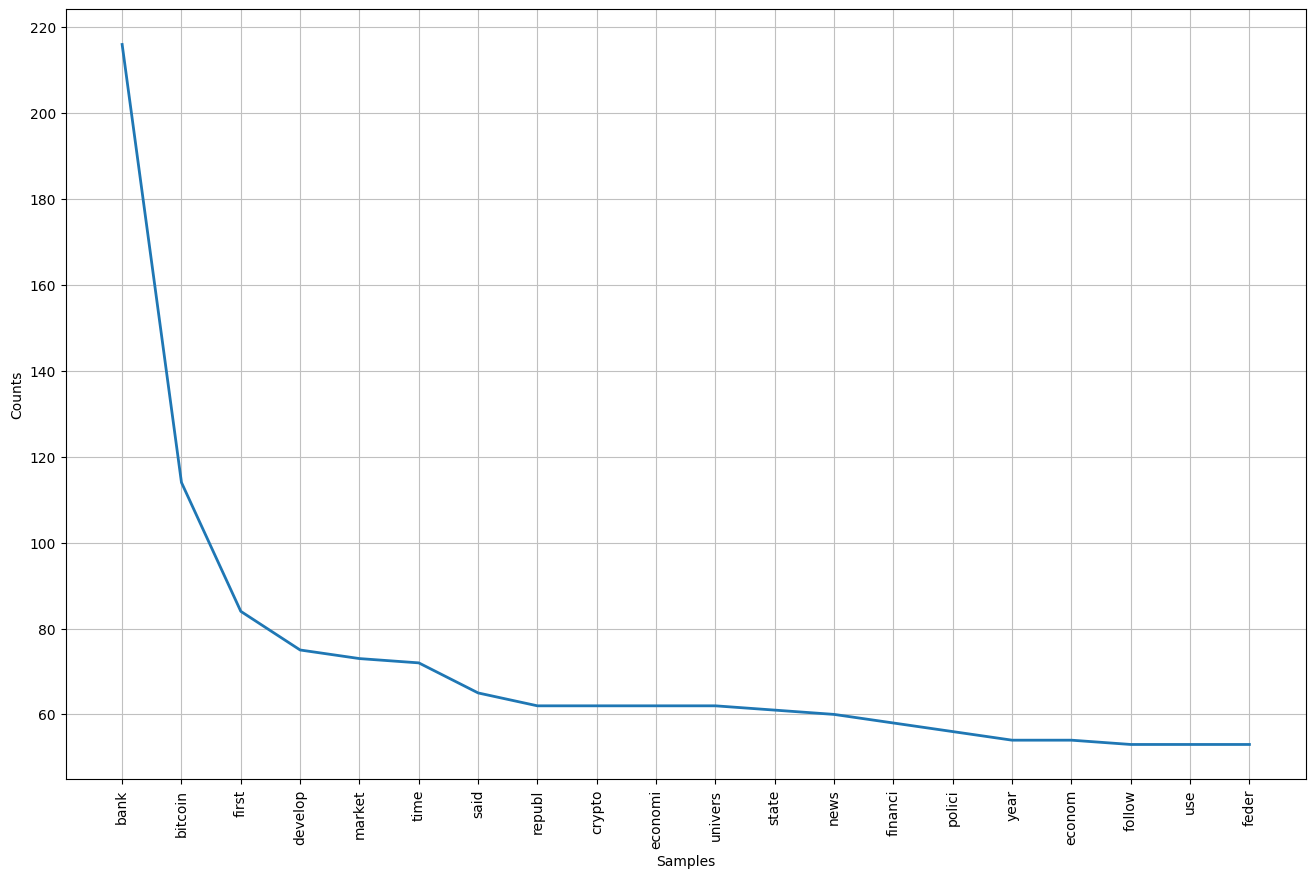

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [45]:
top_k_words=list(freq_dist.keys())[:500]  #top 500 frequency words
res=' '.join(top_k_words)

In [46]:
len(res)

3363

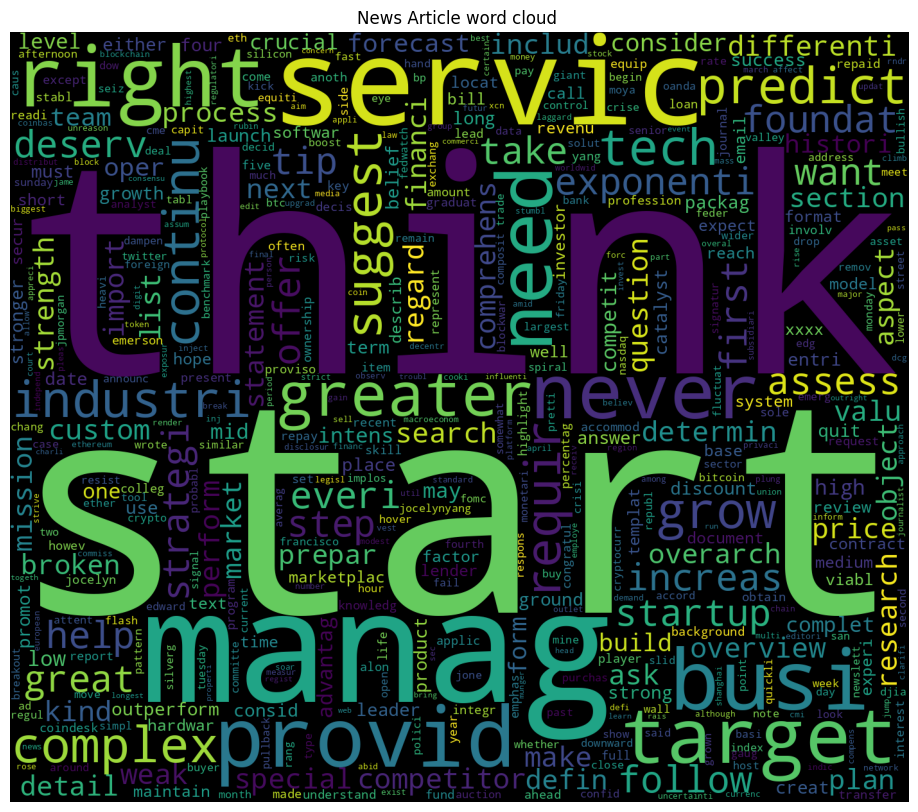

In [47]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(    background_color='black',
                          max_words=1000,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('News Article word cloud ') # visualizing word clouds based on corpus . Using only 1000 words
plt.axis('off')
plt.show()

In [48]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [49]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00


In [50]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def extract_sentiment(article):
    # Initialize VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Extract sentiment scores for the article
    sentiment_scores = sid.polarity_scores(article)

    # Return the compound score (normalized score between -1 and 1)
    return sentiment_scores['compound']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [51]:
df_tech['sentiment'] = df_tech['content'].apply(extract_sentiment)

In [52]:
df_tech.head()

,pubDate,title,country,category,content,sentiment
0,2023-05-02 10:40:42,Starting a Managed Service Provider Business?,united states of america,business,If you are thinking about starting a managed s...,0.9966
1,2023-05-01 21:39:49,Bitcoin Drops Below $28K; JPMorgan Takes Over ...,united states of america,top,Jocelyn Yang Jocelyn Yang is a markets reporte...,0.9851
2,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...,-0.9828
4,2023-05-01 14:12:13,GM terminates hundreds of contract workers at ...,united states of america,business,"General Motors terminated ""several hundred"" co...",-0.9374
6,2023-05-01 12:35:28,JPMorgan Chase Assumes Control of First Republ...,australia,business,JPMorgan Chase Assumes Control of First Republ...,-0.8259


In [53]:
df_energy['sentiment'] = df_energy['content'].apply(extract_sentiment)

In [54]:
df_energy.head(10)

,pubDate,title,country,category,content,sentiment
0,2023-05-02 08:02:27,"France In April – BEVs Up, PHEVs Down, Spring ...",united states of america,business,France saw plugin electric vehicles take 21.1%...,0.9957
1,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...,-0.9828
2,2023-05-01 14:20:00,"More TPS, less gas: Ethereum layer 2 Starknet ...",united states of america,business,Layer-2 blockchain protocols have been in the ...,0.9862
3,2023-05-01 13:00:22,Bhutan mines Bitcoin with hydropower since BTC...,united states of america,business,Bhutan is bullish on Bitcoin ( BTC ). Followin...,0.9753
4,2023-05-01 12:30:05,The Inflation Reduction Act could energize the...,united states of america,world,Commentary Op-Ed The Inflation Reduction Act c...,0.9984
7,2023-05-01 10:30:00,North Dakota farmer partners with tech company...,united states of america,business,"BATHGATE, N.D. — A North Dakota beef producer ...",0.9973
8,2023-05-01 08:00:01,Latam Insights — Steve Hanke Advocates Dollari...,australia,business,Latam Insights — Steve Hanke Advocates Dollari...,-0.8809
9,2023-05-01 04:44:01,Biden Should Release Delayed Offshore Leasing ...,united states of america,business,"For the Biden administration, on the other han...",0.7003


In [55]:
df_economy['sentiment'] = df_economy['content'].apply(extract_sentiment)

In [56]:
df_economy.head()

,pubDate,title,country,category,content,sentiment
0,2023-05-02 08:02:27,"France In April – BEVs Up, PHEVs Down, Spring ...",united states of america,business,France saw plugin electric vehicles take 21.1%...,0.9957
1,2023-05-01 20:09:03,Policy lessons—and surprises—from the ‘Reimagi...,united states of america,world,Commentary Future Development Policy lessons—a...,0.9996
2,2023-05-01 19:07:31,12th annual Municipal Finance Conference,united states of america,world,View all Events Tue Jul 18 Upcoming Event 12th...,0.9743
3,2023-05-01 17:19:17,“Everyone Is Just Scrambling”: Hollywood on Ed...,united states of america,business,Deal or no deal? That’s the question wracking ...,0.6622
4,2023-05-01 17:17:17,Bitcoin Set New Record of Daily Transactions t...,united states of america,top,Daniel Kuhn Daniel Kuhn is a features reporter...,0.9916


In [57]:
df_banking['sentiment']=df_banking['content'].apply(extract_sentiment)
df_banking.head()

,pubDate,title,country,category,content,sentiment
0,2023-05-01 21:39:49,Bitcoin Drops Below $28K; JPMorgan Takes Over ...,united states of america,top,Jocelyn Yang Jocelyn Yang is a markets reporte...,0.9851
1,2023-05-01 20:53:17,Michael Saylor's MicroStrategy Books a Much Sm...,united states of america,top,Aoyon Ashraf Aoyon Ashraf is managing editor w...,0.9628
2,2023-05-01 20:09:03,Policy lessons—and surprises—from the ‘Reimagi...,united states of america,world,Commentary Future Development Policy lessons—a...,0.9996
3,2023-05-01 19:53:10,"FDIC Suggests Scrapping $250,000 Bank Account ...",united states of america,business,The string of regional banking failures that d...,-0.8020
4,2023-05-01 19:07:31,12th annual Municipal Finance Conference,united states of america,world,View all Events Tue Jul 18 Upcoming Event 12th...,0.9743


In [58]:
data=pd.concat([df_banking,df_tech,df_energy,df_economy],axis=0).sample(frac=1).reset_index(drop=True)

In [59]:
data.head(40)

,pubDate,title,country,category,content,sentiment
0,2023-05-01 14:12:13,GM terminates hundreds of contract workers at ...,united states of america,business,"General Motors terminated ""several hundred"" co...",-0.9374
1,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...,-0.9828
2,2023-05-01 13:00:22,Bhutan mines Bitcoin with hydropower since BTC...,united states of america,business,Bhutan is bullish on Bitcoin ( BTC ). Followin...,0.9753
3,2023-05-01 10:30:00,North Dakota farmer partners with tech company...,united states of america,business,"BATHGATE, N.D. — A North Dakota beef producer ...",0.9973
4,2023-05-01 21:39:49,Bitcoin Drops Below $28K; JPMorgan Takes Over ...,united states of america,top,Jocelyn Yang Jocelyn Yang is a markets reporte...,0.9851
5,2023-05-01 19:07:31,12th annual Municipal Finance Conference,united states of america,world,View all Events Tue Jul 18 Upcoming Event 12th...,0.9743
6,2023-05-01 14:20:00,"More TPS, less gas: Ethereum layer 2 Starknet ...",united states of america,business,Layer-2 blockchain protocols have been in the ...,0.9862
7,2023-05-01 14:30:37,Charlie Munger Raises Concerns Over Troubled C...,australia,business,Charlie Munger Raises Concerns Over Troubled C...,-0.9828
8,2023-05-01 17:19:17,“Everyone Is Just Scrambling”: Hollywood on Ed...,united states of america,business,Deal or no deal? That’s the question wracking ...,0.6622
9,2023-05-01 13:41:36,American Airlines Pilots Vote To Authorize Strike,united states of america,business,Pilots at American Airlines voted overwhelming...,0.9795


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.5 MB/s eta 0:00:00


In [60]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42)

In [61]:
train_data.head()

,pubDate,title,country,category,content,sentiment
9,2023-05-01 13:41:36,American Airlines Pilots Vote To Authorize Strike,united states of america,business,Pilots at American Airlines voted overwhelming...,0.9795
19,2023-05-01 08:00:01,Latam Insights — Steve Hanke Advocates Dollari...,australia,business,Latam Insights — Steve Hanke Advocates Dollari...,-0.8809
21,2023-05-01 06:00:47,BRICS to Promote National Currencies Before Is...,australia,business,The BRICS bloc is now focused on expanding the...,0.9770
12,2023-05-01 02:00:21,"Syria Urges BRICS to Lead in Ditching Dollar, ...",australia,business,"Syria Urges BRICS to Lead in Ditching Dollar, ...",0.9899
0,2023-05-01 14:12:13,GM terminates hundreds of contract workers at ...,united states of america,business,"General Motors terminated ""several hundred"" co...",-0.9374


In [123]:
# Define the neural network architecture
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
# Load the BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
bert_model = TFAutoModel.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

input_layer = tf.keras.layers.Input(shape=(None,), dtype=tf.int32)
bert_layer = bert_model(input_layer)[0][:, 0, :]
dense_layer_1 = tf.keras.layers.Dense(512, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(1e-4))(bert_layer)
dense_layer_2 = tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4))(dense_layer_1)
dense_layer_3 = tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4))(dense_layer_2)
dropout_layer_1=tf.keras.layers.Dropout(0.2)(dense_layer_3)
dense_layer_4 = tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4))(dropout_layer_1)
output_layer = tf.keras.layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(1e-4))(dense_layer_4)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(learning_rate=6e-6), metrics=['mse'])

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [87]:
inputs = tokenizer(list(train_data['content']), padding=True, truncation=True, max_length=250, return_tensors='tf')

In [88]:
inputs

{'input_ids': <tf.Tensor: shape=(28, 250), dtype=int32, numpy=
array([[    0,   510,   718, ...,     6,  4032,     2],
       [    0, 41933,   424, ...,     8, 22380,     2],
       [    0,   133,  6823, ...,    32,   145,     2],
       ...,
       [    0, 41933,   424, ...,     8, 22380,     2],
       [    0, 25010,   794, ...,  9396,   458,     2],
       [    0, 19842,  1755, ..., 14324,  4226,     2]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(28, 250), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [124]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(inputs['input_ids'], train_data['sentiment'], epochs=150, validation_split=0.3,callbacks=[early_stopping_callback])
model.summary()

Epoch 1/150


1/1 [==============================] - 46s 46s/step - loss: 2.8808 - mse: 2.7082 - val_loss: 1.4232 - val_mse: 1.2505
Epoch 2/150
1/1 [==============================] - 1s 1s/step - loss: 2.5465 - mse: 2.3739 - val_loss: 1.2700 - val_mse: 1.0974
Epoch 3/150
1/1 [==============================] - 1s 1s/step - loss: 2.2351 - mse: 2.0625 - val_loss: 1.1626 - val_mse: 0.9900
Epoch 4/150
1/1 [==============================] - 1s 1s/step - loss: 2.0159 - mse: 1.8432 - val_loss: 1.0802 - val_mse: 0.9076
Epoch 5/150
1/1 [==============================] - 1s 1s/step - loss: 1.7564 - mse: 1.5838 - val_loss: 1.0295 - val_mse: 0.8569
Epoch 6/150
1/1 [==============================] - 1s 1s/step - loss: 1.5913 - mse: 1.4187 - val_loss: 1.0045 - val_mse: 0.8319
Epoch 7/150
1/1 [==============================] - 1s 1s/step - loss: 1.5558 - mse: 1.3832 - val_loss: 0.9625 - val_mse: 0.7898
Epoch 8/150
1/1 [==============================] - 1s 1s/step - loss: 1.3503 - mse: 1.1776 - val_loss: 0.9355 - va

In [125]:
test_inputs=tokenizer(list(test_data['content']), padding=True, truncation=True, max_length=250, return_tensors='tf')

In [128]:
# Convert test_inputs to a numpy array
test_inputs = np.array(test_inputs['input_ids'])

# Evaluate the model on test data
loss, mse = model.evaluate(test_inputs, test_data['sentiment'])

1/1 [==============================] - 0s 207ms/step - loss: 0.5898 - mse: 0.4172


In [147]:
print('True value :',str(list(test_data['sentiment'])[4])) # true output of a sample test input
# taking a sample test input and predicting the true output
test_input =list(test_data['content'])[4]

# Converting  the sample input text to  token IDs using tokenizer
test_tokens = tokenizer.encode(test_input, add_special_tokens=True)

# Passing  the token IDs to the model
test_output = model.predict(tf.constant([test_tokens]))
print("Test output:", test_output[0][0]) ## predicting output on sample input


True value : 0.6622
1/1 [==============================] - 0s 323ms/step
Test output: 0.80062366


In [148]:
# another example
print('True value :',str(list(test_data['sentiment'])[0]))
test_input =list(test_data['content'])[0]
test_tokens = tokenizer.encode(test_input, add_special_tokens=True)
test_output = model.predict(tf.constant([test_tokens]))
print("Test output:", test_output[0][0]) 

True value : 0.9984
1/1 [==============================] - 0s 322ms/step
Test output: 1.0063916


## The performance of the model can be further improved by taking more number of inputs, which was not possible in this case due to restrictions of API results to maximum 10 articles and also due to lack of computational resources to train such a huge data

In [150]:
file_names_tech = ["AMD","AMZN","GOOG","INTC","MSFT","NVDA"]
data_tech  =pd.DataFrame()
temp = pd.read_csv("./AAPL.csv",header = 0)
data_tech["date"] = pd.to_datetime(temp["Date"])
data_tech["AAPL"] = temp["Adj Close"]
for i in file_names_tech:
    temp = pd.read_csv(f"./{i}.csv",header = 0)
    data_tech[f"{i}"] = temp["Adj Close"]
#data_tech.info()


In [152]:
data_tech.head()

,date,AAPL,AMD,AMZN,GOOG,INTC,MSFT,NVDA
0,2023-01-17,135.732758,71.589996,96.050003,92.160004,29.243670,239.749512,176.989944
1,2023-01-18,135.003876,70.529999,95.459999,91.779999,28.463179,235.220840,173.740494
2,2023-01-19,135.063782,67.709999,93.680000,93.910004,28.077873,231.350525,167.621521
3,2023-01-20,137.659805,70.070000,97.250000,99.279999,28.868242,239.619827,178.359711
4,2023-01-23,140.894882,76.529999,97.519997,101.209999,29.905603,241.973923,191.897400


In [151]:


file_names_economy = ["CAT","FDX","LVMUY","PCG","WMT"]
data_economy  =pd.DataFrame()
temp = pd.read_csv("./CAT.csv",header = 0)
data_economy["date"] = pd.to_datetime(temp["Date"])
data_economy["CAT"] = temp["Adj Close"] 
for i in file_names_economy:
    temp = pd.read_csv(f"./{i}.csv",header = 0)
    data_economy[f"{i}"] = temp["Adj Close"]
#data_economy.info()


In [153]:
file_names_energy = ["CVX","EOG","PSX","SLB","XOM"]
data_energy  =pd.DataFrame()
temp = pd.read_csv("./COP.csv",header = 0) 
data_energy["date"] = pd.to_datetime(temp["Date"])
data_energy["COP"] = temp["Adj Close"] 
for i in file_names_energy:
    temp = pd.read_csv(f"./{i}.csv",header = 0)
    data_energy[f"{i}"] = temp["Adj Close"]
#data_energy.info()


In [154]:

file_names_banking = ["C","JPM","PYPL","USB","WFC"] 
data_banking  =pd.DataFrame()
temp = pd.read_csv("./BAC.csv",header = 0) 
data_banking["date"] = pd.to_datetime(temp["Date"])
data_banking["BAC"] = temp["Adj Close"] 
for i in file_names_banking:
    temp = pd.read_csv(f"./{i}.csv",header = 0)
    data_banking[f"{i}"] = temp["Adj Close"]

In [155]:


#data_banking.info()
data_tech.set_index("date",inplace=True)
data_banking.set_index("date",inplace=True)
data_economy.set_index("date",inplace=True)
data_energy.set_index("date",inplace=True)

In [156]:
data_banking.head()

,BAC,C,JPM,PYPL,USB,WFC
date,,,,,,
2023-01-17,34.297554,49.818653,139.703598,80.180000,46.811310,43.840343
2023-01-18,33.502708,48.947247,135.506546,77.309998,45.202911,43.105038
2023-01-19,33.015865,48.887833,133.700714,76.750000,45.025299,42.677765
2023-01-20,33.631866,50.591034,134.028137,79.089996,45.844296,43.641613
2023-01-23,34.098839,51.472343,136.201096,79.500000,47.038261,44.744576


In [157]:
data_economy.head()

,CAT,FDX,LVMUY,PCG,WMT
date,,,,,
2023-01-17,255.043686,187.089005,171.470001,15.87,143.820541
2023-01-18,251.620010,186.631546,172.050003,15.61,140.265106
2023-01-19,245.750000,183.210571,168.309998,15.44,138.263306
2023-01-20,249.710007,185.845917,170.020004,15.65,139.966324
2023-01-23,252.699997,190.092285,171.630005,15.73,142.057755


In [158]:
data_energy.head()

,COP,CVX,EOG,PSX,SLB,XOM
date,,,,,,
2023-01-17,118.970222,178.908417,127.999725,101.484123,58.184711,112.067650
2023-01-18,117.298073,175.676971,126.749840,101.682114,56.860977,109.765366
2023-01-19,118.376564,177.431458,129.210236,103.335403,57.109798,110.469948
2023-01-20,120.513756,179.314804,130.647125,105.889587,57.079937,112.484444
2023-01-23,118.861382,179.076920,132.054459,105.869789,55.596954,111.898949


In [161]:
#WITHIN dates -> date1 and date2 input parameters
import copy
def process(start_date,end_date,data):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    x = data.loc[start_date:end_date]
    #print(x)
    temp = copy.deepcopy(x)
    total = x.shape[1]
    rows = x.shape[0]
    temp.drop(index=temp.index[0],axis=0,inplace=True)
    #print("---------")
    #print(temp)
    for i in range(1,rows):
        for j in range(total):
            temp.iloc[i-1,j]=(x.iloc[i,j]-x.iloc[i-1,j])/x.iloc[i-1,j]
    
    #Now temp is basically just defined as the return matrix.
    temp["avg_return"] = temp.sum(axis=1)/total
    return temp["avg_return"].sum(axis=0) * 100

In [162]:
tech_list,ener_list,econ_list,bank_list = [],[],[],[]
actual_start = pd.to_datetime("2023-02-01")
actual_end = pd.to_datetime("2023-03-10")

date_s = list(data_tech.index)
#But we only need the dates used in the sentiment analysis section, the range of which is defined by the actual_start and actual_end dates.
date_s = list(filter(lambda x:x>=actual_start and x<=actual_end,date_s))
#print(date_s)
#index_list is going to be used in the final plotting function..
index_list = list(map(lambda x:x.strftime('%m-%d-%Y'),date_s))
#print(index_list)

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    tech_list.append(process(start,end,data_tech))

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    ener_list.append(process(start,end,data_energy))

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    econ_list.append(process(start,end,data_economy))

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    bank_list.append(process(start,end,data_banking))


#Now we have all the lists.
# print(len(tech_list))
# print(len(ener_list))
# print(len(econ_list))
# print(len(bank_list))


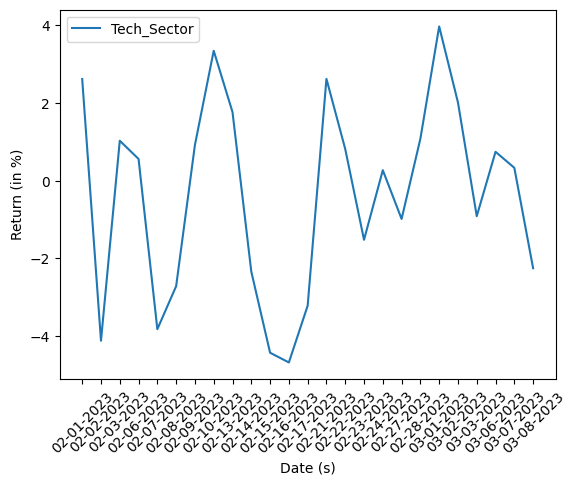

In [163]:
#plotting will start from here.
from matplotlib import pyplot as plt


#Uncomment this line if you want to shorten the length of the x-labels i the plot to reflect only the month and day. 
# index_list = list(map(lambda x:x[:5],index_list))
plt.plot(index_list[:-2], tech_list,label = 'Tech_Sector')
plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()


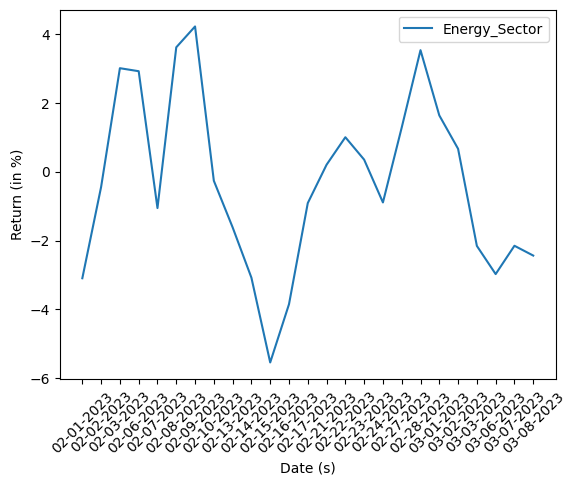

In [165]:
plt.plot(index_list[:-2], ener_list,label = 'Energy_Sector')
plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()


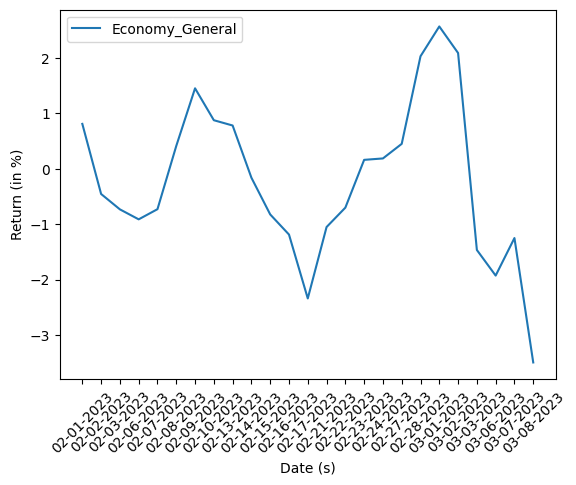

In [166]:
plt.plot(index_list[:-2], econ_list,label = 'Economy_General')
plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()


In [167]:
avg_sentiment_tech = df_tech['sentiment'].mean()

# Print the result
print("The average sentiment of tech sector  is:", avg_sentiment_tech)

The average sentiment of tech sector  is: 0.2767


In [170]:
avg_return_tech = np.mean(tech_list)
print("Average stock return for tech sector in the given time period:", avg_return_tech)

Average stock return for tech sector in the given time period: -0.3546483327213606


In [171]:
avg_sentiment_economy = df_economy['sentiment'].mean()

# Print the result
print("The average sentiment of economy is:", avg_sentiment_economy)

The average sentiment of economy is: 0.5714600000000001


In [174]:
avg_return_econ = np.mean(econ_list)
print("Average stock return for energy sector in the given time period:", avg_return_econ)

Average stock return for energy sector in the given time period: -0.21534295994645725


In [175]:
avg_sentiment_energy = df_energy['sentiment'].mean()
print("The average sentiment of energy sector  is:", avg_sentiment_energy)

avg_return_ener = np.mean(ener_list)
print("Average stock return for energy sector in the given time period:", avg_return_ener)

The average sentiment of energy sector  is: 0.4736875
Average stock return for energy sector in the given time period: -0.3237991843878207


In [177]:
sent_scores=[avg_sentiment_economy,avg_sentiment_energy,avg_sentiment_tech]
return_scores=[avg_return_econ,avg_return_ener,avg_return_tech]

In [179]:
import scipy.stats as stats

corr, p_value = stats.pearsonr(sent_scores, return_scores)
print("Correlation score:", corr)
print("p-value:", p_value)

Correlation score: 0.8760761766569718
p-value: 0.3203044693280948


## Thus the high correlation scores between averages of sentiment scores and stock return validate the correctness of our hypothesis 